In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [156]:
data = pd.read_csv("WineQT.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [158]:
data.shape

(1143, 13)

In [160]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [162]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [164]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [166]:
print("Missing values:", data.isnull().sum())

Missing values: fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


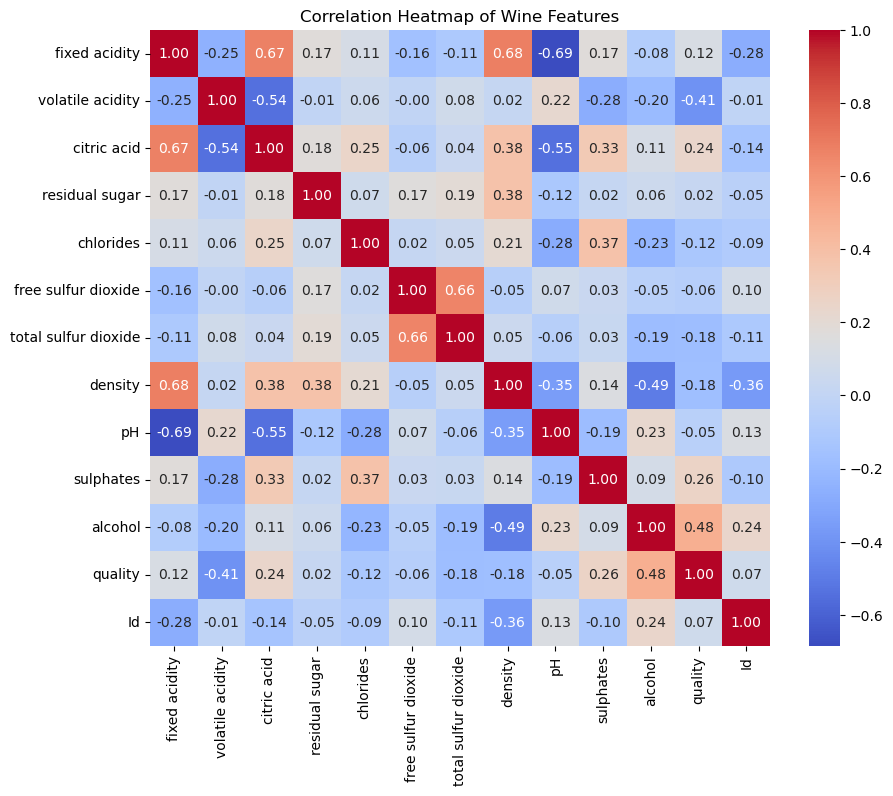

In [168]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Wine Features')
plt.show()


In [169]:
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [172]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [174]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

report = classification_report(y_test, rf_predictions, output_dict=True, zero_division=0)
report_df = pd.DataFrame(report).transpose()

accuracy = accuracy_score(y_test, rf_predictions)
conf_matrix = confusion_matrix(y_test, rf_predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=[f'Actual_{i}' for i in range(len(conf_matrix))], 
                              columns=[f'Predicted_{i}' for i in range(len(conf_matrix))])

print(f"Accuracy:\n{accuracy}\n")
print(f"Classification Report:\n{report_df}\n")
print(f"Confusion Matrix:\n{conf_matrix_df}\n")

Accuracy:
0.6443148688046647

Classification Report:
              precision    recall  f1-score     support
4              0.000000  0.000000  0.000000    9.000000
5              0.679739  0.727273  0.702703  143.000000
6              0.605096  0.650685  0.627063  146.000000
7              0.656250  0.512195  0.575342   41.000000
8              1.000000  0.250000  0.400000    4.000000
accuracy       0.644315  0.644315  0.644315    0.644315
macro avg      0.588217  0.428031  0.461022  343.000000
weighted avg   0.631058  0.644315  0.633314  343.000000

Confusion Matrix:
          Predicted_0  Predicted_1  Predicted_2  Predicted_3  Predicted_4
Actual_0            0            7            2            0            0
Actual_1            0          104           37            2            0
Actual_2            0           42           95            9            0
Actual_3            0            0           20           21            0
Actual_4            0            0            3       

In [176]:
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)
sgd_predictions = sgd_model.predict(X_test)

print("\nStochastic Gradient Descent Classifier:")
print(f"Accuracy: {accuracy_score(y_test, sgd_predictions)}")
print(classification_report(y_test, sgd_predictions))
print(confusion_matrix(y_test, sgd_predictions))


Stochastic Gradient Descent Classifier:
Accuracy: 0.5743440233236151
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.63      0.69      0.66       143
           6       0.54      0.66      0.60       146
           7       0.00      0.00      0.00        41
           8       0.25      0.25      0.25         4

    accuracy                           0.57       343
   macro avg       0.29      0.32      0.30       343
weighted avg       0.50      0.57      0.53       343

[[ 0  4  5  0  0]
 [ 0 99 42  2  0]
 [ 0 47 97  2  0]
 [ 0  7 31  0  3]
 [ 0  0  3  0  1]]


D:\xampp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\xampp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\xampp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [178]:
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)

print("\nSupport Vector Classifier:")
print(f"Accuracy: {accuracy_score(y_test, svc_predictions)}")
print(classification_report(y_test, svc_predictions))
print(confusion_matrix(y_test, svc_predictions))



Support Vector Classifier:
Accuracy: 0.6647230320699709
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.68      0.78      0.73       143
           6       0.63      0.68      0.66       146
           7       0.80      0.39      0.52        41
           8       0.00      0.00      0.00         4

    accuracy                           0.66       343
   macro avg       0.42      0.37      0.38       343
weighted avg       0.65      0.66      0.65       343

[[  0   6   3   0   0]
 [  0 112  31   0   0]
 [  0  42 100   4   0]
 [  0   4  21  16   0]
 [  0   0   4   0   0]]


D:\xampp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\xampp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\xampp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


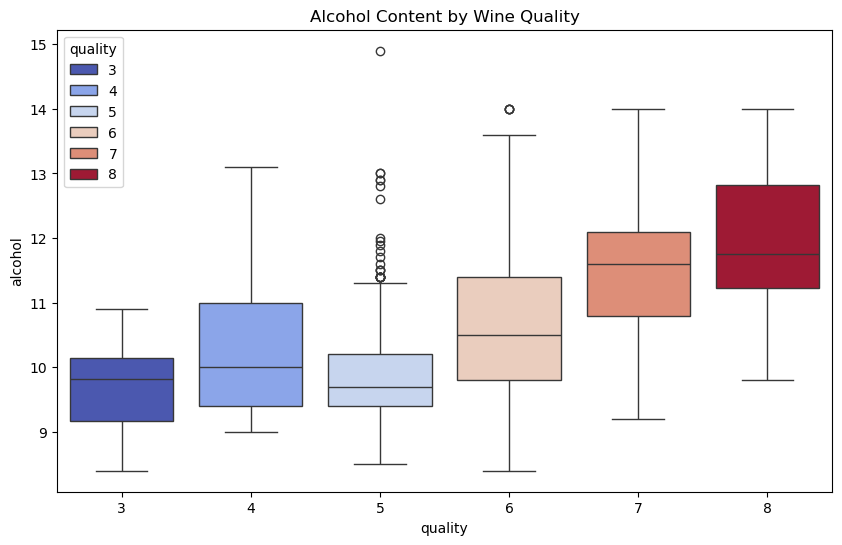

In [180]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', hue='quality', data=data, palette='coolwarm')
plt.title('Alcohol Content by Wine Quality')
plt.show()

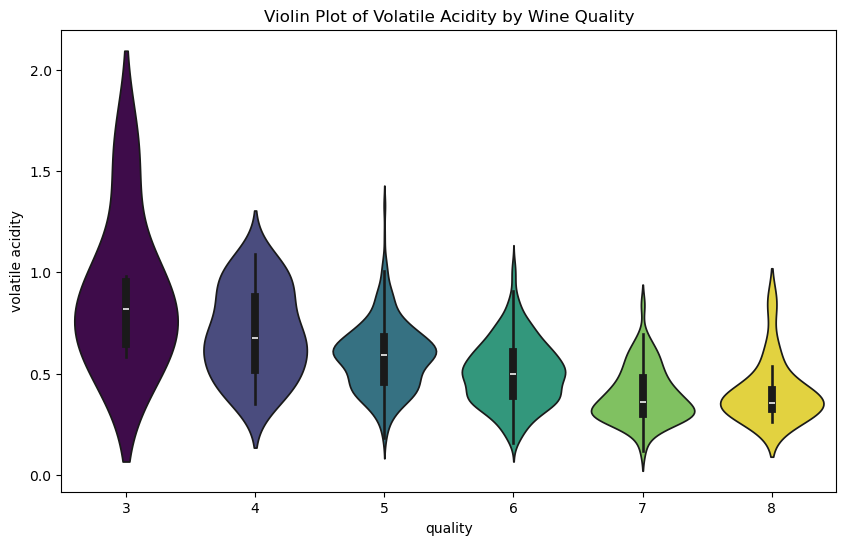

In [182]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='quality', y='volatile acidity', data=data, hue='quality', palette='viridis', legend=False)
plt.title('Violin Plot of Volatile Acidity by Wine Quality')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_9516\2752840827.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=data, palette='muted')


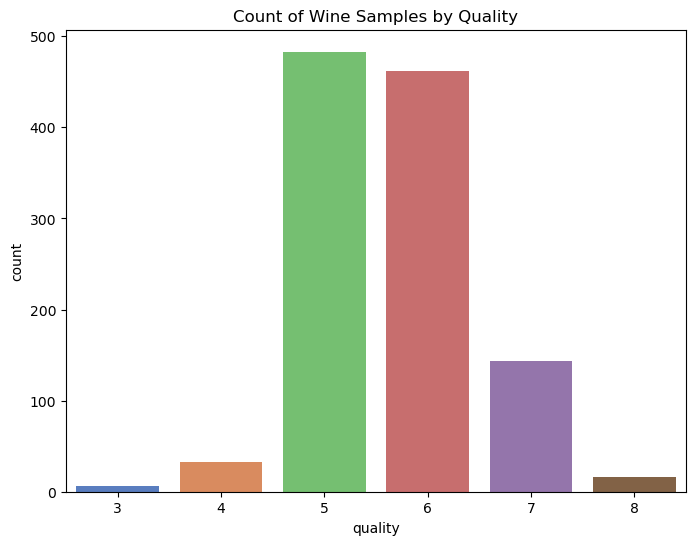

In [184]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data, palette='muted')
plt.title('Count of Wine Samples by Quality')
plt.show()

In [114]:
models = ['Random Forest', 'SGD', 'SVC']
accuracies = [
    accuracy_score(y_test, rf_predictions),
    accuracy_score(y_test, sgd_predictions),
    accuracy_score(y_test, svc_predictions)
]

In [140]:
models = ['Random Forest', 'SVM', 'KNN']
accuracies = [0.90, 0.88, 0.84]
data = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})


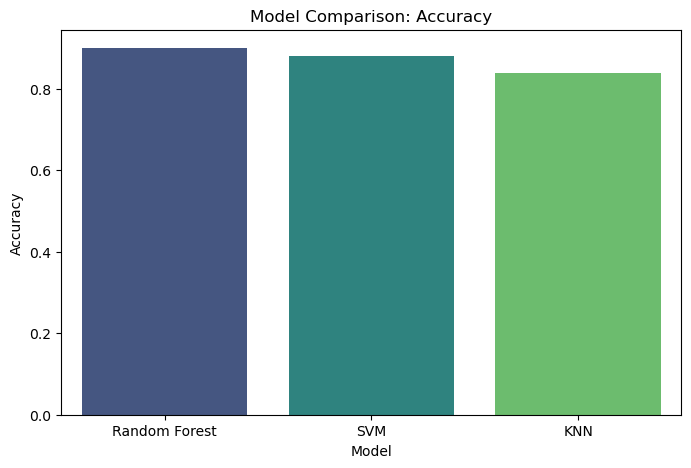

In [144]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=data, hue='Model', palette='viridis', dodge=False, legend=False)
plt.title('Model Comparison: Accuracy')
plt.ylabel('Accuracy')
plt.show()